In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import scipy
import commom.distribution_normality_check as utils
import warnings
import seaborn as sns
import numpy as np
from itertools import product
import nltk
from nltk import ngrams
from nltk.corpus import stopwords
from nltk import word_tokenize
import csv
from wordcloud import WordCloud
import re

warnings.filterwarnings("ignore")

#### a) Ler o dataset fakeTelegram.BR_2022.csv

In [14]:
df = pd.read_csv('../data/fakeTelegram.BR_2022.csv')
df.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Texto,telegram,NaN,NaN
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Texto,telegram,NaN,NaN
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Texto,telegram,NaN,NaN
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,NaN,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637


#### b) Remova os trava-zaps.

In [15]:
df = df[~df["trava_zap"]]
df.head(10)

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Texto,telegram,NaN,NaN
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Texto,telegram,NaN,NaN
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Texto,telegram,NaN,NaN
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,NaN,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637
5,2022-10-05 06:28:30,NaN,b52442a5fbc459ae590dca0d215e32f9,NaN,NaN,NaN,False,False,False,Kķkkkkk to rindo até agora....Quem disse q ia ...,5,2022-10-05 06:29:29.046694,0.7003,0.197813,2735,Texto,telegram,NaN,NaN
6,2022-10-05 06:29:09,3b685d44ff197b98d7c9e99b8f6b5281,b52442a5fbc459ae590dca0d215e32f9,NaN,NaN,NaN,False,False,False,*SE ALGUÉM TE PERGUNTAR O QUE FOI QUE BOLSONAR...,5,2022-10-05 06:29:29.33448,0.9716,0.974258,2736,Texto,telegram,NaN,NaN
7,2022-10-05 06:43:51,a7db4ff6a6d35e57be5bcf02f400cec6,857cd5311da1bdc15eb9e6918a47c6c6,4fe93a3772445f64173ef03db1fed83c.jpg,image/jpg,NaN,True,False,False,NaN,5,2022-10-05 06:43:54.51408,NaN,NaN,891535,Imagem,telegram,NaN,4fe93a3772445f64173ef03db1fed83c
8,2022-10-05 07:09:39,d2c33afd13a3165be031b6c244f7140d,d9c080b9db8cd9d0e88e870ce782c01a,30f29cca618753961cb97be95e87e3b4.jpg,image/jpg,NaN,True,False,False,NaN,5,2022-10-05 07:10:16.569761,NaN,NaN,314861,Imagem,telegram,NaN,30f29cca618753961cb97be95e87e3b4
9,2022-10-05 06:29:48,a7e85072244cae15446c9d517dc01a1a,b8a8737812c7fd7d3e0bdbb65ef6306f,NaN,NaN,www.marketingdigitalparavencer.com.br,False,True,False,O Deputado Federal pelo NOVO e que foi candida...,5,2022-10-05 06:29:49.901419,-0.8779,0.035876,7248,Texto,telegram,NaN,NaN


#### c) Remover as linhas repetidas (duplicadas).


In [16]:
df = df.drop_duplicates()
df.head(10)

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Texto,telegram,NaN,NaN
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Texto,telegram,NaN,NaN
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Texto,telegram,NaN,NaN
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,NaN,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637
5,2022-10-05 06:28:30,NaN,b52442a5fbc459ae590dca0d215e32f9,NaN,NaN,NaN,False,False,False,Kķkkkkk to rindo até agora....Quem disse q ia ...,5,2022-10-05 06:29:29.046694,0.7003,0.197813,2735,Texto,telegram,NaN,NaN
6,2022-10-05 06:29:09,3b685d44ff197b98d7c9e99b8f6b5281,b52442a5fbc459ae590dca0d215e32f9,NaN,NaN,NaN,False,False,False,*SE ALGUÉM TE PERGUNTAR O QUE FOI QUE BOLSONAR...,5,2022-10-05 06:29:29.33448,0.9716,0.974258,2736,Texto,telegram,NaN,NaN
7,2022-10-05 06:43:51,a7db4ff6a6d35e57be5bcf02f400cec6,857cd5311da1bdc15eb9e6918a47c6c6,4fe93a3772445f64173ef03db1fed83c.jpg,image/jpg,NaN,True,False,False,NaN,5,2022-10-05 06:43:54.51408,NaN,NaN,891535,Imagem,telegram,NaN,4fe93a3772445f64173ef03db1fed83c
8,2022-10-05 07:09:39,d2c33afd13a3165be031b6c244f7140d,d9c080b9db8cd9d0e88e870ce782c01a,30f29cca618753961cb97be95e87e3b4.jpg,image/jpg,NaN,True,False,False,NaN,5,2022-10-05 07:10:16.569761,NaN,NaN,314861,Imagem,telegram,NaN,30f29cca618753961cb97be95e87e3b4
9,2022-10-05 06:29:48,a7e85072244cae15446c9d517dc01a1a,b8a8737812c7fd7d3e0bdbb65ef6306f,NaN,NaN,www.marketingdigitalparavencer.com.br,False,True,False,O Deputado Federal pelo NOVO e que foi candida...,5,2022-10-05 06:29:49.901419,-0.8779,0.035876,7248,Texto,telegram,NaN,NaN


#### d) Remover textos com menos de 5 palavras.

In [17]:
df = df[df["text_content_anonymous"].str.split().str.len() > 5]
df.head(10)

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Texto,telegram,NaN,NaN
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Texto,telegram,NaN,NaN
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Texto,telegram,NaN,NaN
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb
5,2022-10-05 06:28:30,NaN,b52442a5fbc459ae590dca0d215e32f9,NaN,NaN,NaN,False,False,False,Kķkkkkk to rindo até agora....Quem disse q ia ...,5,2022-10-05 06:29:29.046694,0.7003,0.197813,2735,Texto,telegram,NaN,NaN
6,2022-10-05 06:29:09,3b685d44ff197b98d7c9e99b8f6b5281,b52442a5fbc459ae590dca0d215e32f9,NaN,NaN,NaN,False,False,False,*SE ALGUÉM TE PERGUNTAR O QUE FOI QUE BOLSONAR...,5,2022-10-05 06:29:29.33448,0.9716,0.974258,2736,Texto,telegram,NaN,NaN
9,2022-10-05 06:29:48,a7e85072244cae15446c9d517dc01a1a,b8a8737812c7fd7d3e0bdbb65ef6306f,NaN,NaN,www.marketingdigitalparavencer.com.br,False,True,False,O Deputado Federal pelo NOVO e que foi candida...,5,2022-10-05 06:29:49.901419,-0.8779,0.035876,7248,Texto,telegram,NaN,NaN
10,2022-10-05 06:30:45,e964b908e836949e3b461fbd90c3eee3,c8f2de56550ed0bf85249608b7ead93d,NaN,NaN,NaN,False,False,False,"Saiam desse grupo amigos bolsonaristas, urgent...",5,2022-10-05 06:31:29.216572,-0.9423,0.934309,19282,Texto,telegram,NaN,NaN
11,2022-10-05 06:32:21,NaN,2ff252ad4422e11a6a8abfaa747abb55,NaN,NaN,t.me/alexeconomia,False,True,False,Gazprom da Rússia: Retomamos o fornecimento de...,5,2022-10-05 06:32:29.06454,-0.1531,NaN,48922,Texto,telegram,NaN,NaN
12,2022-10-05 06:32:50,NaN,c8f2de56550ed0bf85249608b7ead93d,NaN,NaN,NaN,False,False,False,"Saiam desse grupo amigos bolsonaristas, urgent...",5,2022-10-05 06:32:51.605743,-0.9596,0.999971,19283,Texto,telegram,NaN,NaN


#### e) Para cada atributo numérico apresente:


#### 1. Medidas de Tendência Central

In [18]:
numeric_attributes = df.select_dtypes(include=[int, float])
numeric_attributes = numeric_attributes.loc[:, ~numeric_attributes.columns.str.contains('id')]
numeric_attributes

,score_sentiment,score_misinformation
0,0.0000,NaN
1,0.0644,NaN
2,-0.3551,0.157242
3,0.0000,NaN
5,0.7003,0.197813
...,...,...
557580,NaN,NaN
557581,0.1027,NaN
557583,0.0000,NaN
557584,0.0000,NaN


#### Média

In [19]:
numeric_attributes.mean().to_frame(name="mean")

,mean
score_sentiment,0.022036
score_misinformation,0.312263


#### Mediana


In [20]:
numeric_attributes.median().to_frame(name="median")

,median
score_sentiment,0.000000
score_misinformation,0.197592


#### Moda

In [21]:
numeric_attributes.mode().iloc[0].to_frame(name="mode")

,mode
score_sentiment,0.000000
score_misinformation,0.110628


#### 2. Medidas de Variabilidade


#### Variância e Desvio Padrão


In [22]:
numeric_attributes.agg(["var", "std"]).T

,var,std
score_sentiment,0.284435,0.533325
score_misinformation,0.086261,0.293703


#### Min, Max, Amplitude

In [23]:
variability = numeric_attributes.agg(["min", "max"]).T
variability["range"] = variability["max"] - variability["min"]
variability

,min,max,range
score_sentiment,-1.000000,0.9992,1.999200
score_misinformation,0.000003,1.0000,0.999997


#### 25%, 75%, IQR

In [24]:
quartiles = numeric_attributes.describe().T[["25%", "75%"]]
quartiles["IQR"] = quartiles["75%"] - quartiles["25%"]
quartiles

,25%,75%,IQR
score_sentiment,-0.401900,0.510600,0.91250
score_misinformation,0.078466,0.490396,0.41193


#### 3. Tabela de Frequência e Histograma

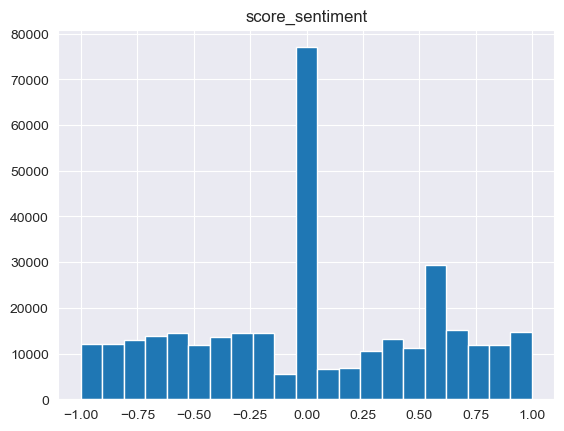

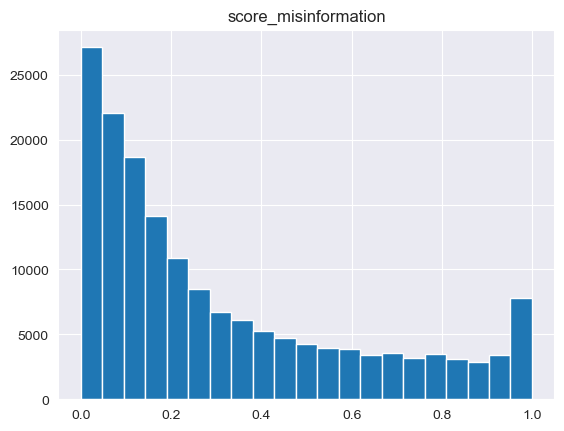

In [25]:
for col in numeric_attributes.columns:
    k = math.ceil(1 + 3.3 * math.log10(numeric_attributes.size))
    plt.hist(numeric_attributes[col], bins=k)
    plt.title(col)
    plt.show()

#### Tabela de Frequência

In [26]:
for col in numeric_attributes.columns:
    n = numeric_attributes[col].count()
    bins = 10
    range = numeric_attributes[col].max() - numeric_attributes[col].min()
    frequencies = pd.cut(numeric_attributes[col].dropna(), bins=bins).value_counts().sort_index()
    table = pd.DataFrame({
        "Frequency": frequencies,
        "RelativeFrequency": frequencies / n,
    })
    table["PercentualFrequency"] = table["RelativeFrequency"] * 100
    table["AccumulatedFrequency"] = table["PercentualFrequency"].cumsum()
    table["Density"] = table["Frequency"] / (n * range / bins)

    print(f"Table for {col}:")
    print(table)
    print("\n")

Table for score_sentiment:
                 Frequency  RelativeFrequency  PercentualFrequency  \
score_sentiment                                                      
(-1.002, -0.8]       25617           0.076753             7.675276   
(-0.8, -0.6]         27978           0.083827             8.382670   
(-0.6, -0.4]         30183           0.090433             9.043325   
(-0.4, -0.2]         25033           0.075003             7.500300   
(-0.2, -0.0004]      18320           0.054890             5.488974   
(-0.0004, 0.2]       85648           0.256616            25.661553   
(0.2, 0.399]         22621           0.067776             6.777625   
(0.399, 0.599]       42516           0.127385            12.738495   
(0.599, 0.799]       26886           0.080555             8.055489   
(0.799, 0.999]       28958           0.086763             8.676294   

                 AccumulatedFrequency   Density  
score_sentiment                                  
(-1.002, -0.8]               7.6

#### 4. Boxplot

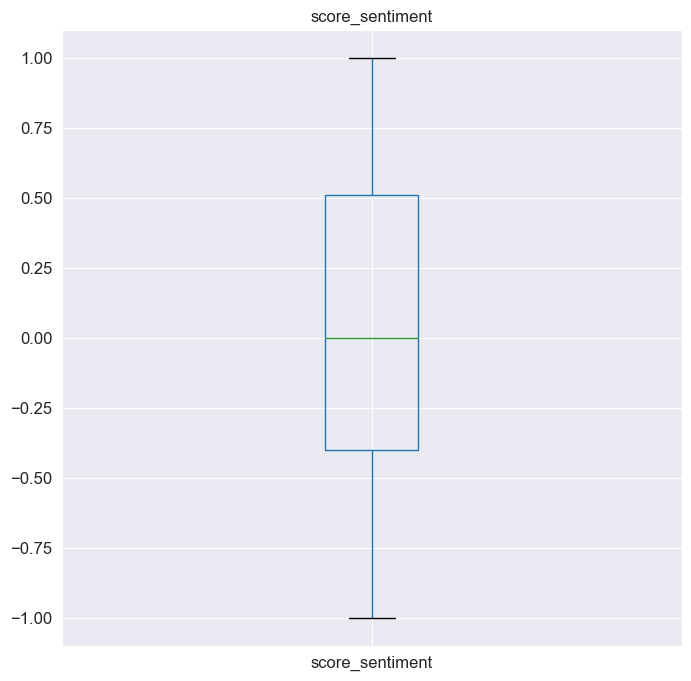

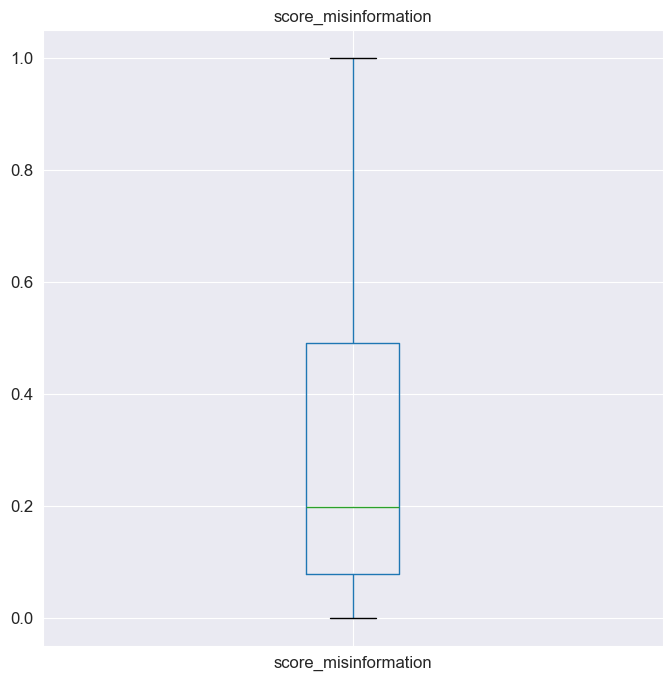

In [27]:
for col in numeric_attributes.columns:
    numeric_attributes.boxplot(column=col, fontsize='large', figsize=(8, 8))
    plt.title(col)
    plt.show()

#### 5. QQ-Plot


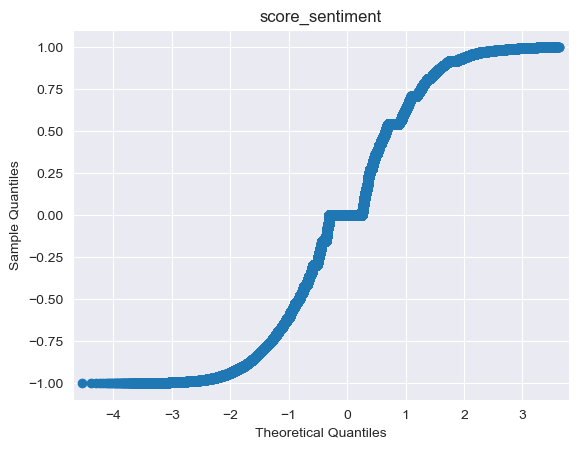

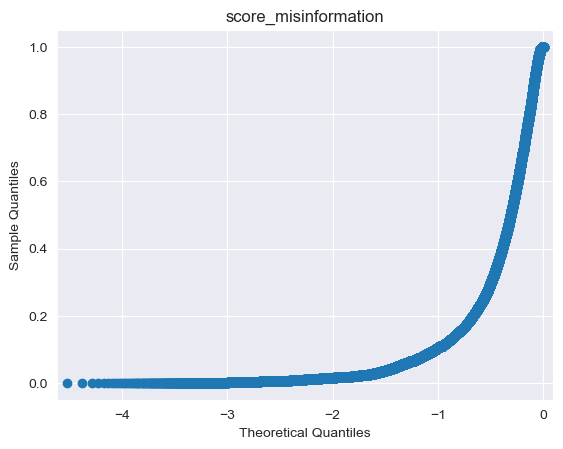

In [28]:
for col in numeric_attributes.columns:
    sm.qqplot(numeric_attributes[col])
    plt.title(col)
    plt.show()

#### 6. Teste de Normalidade

In [29]:
for col in numeric_attributes.columns:
    print("\n", col)
    utils.check_normality(numeric_attributes[col])



 score_sentiment
Os dados não seguem uma distribuição normal.

 score_misinformation
Os dados não seguem uma distribuição normal.


#### 7. Best Fit Distribution (usando diferentes métodos)


In [30]:
distribution_names = ["beta",
                      "expon",
                      "gamma",
                      "lognorm",
                      "norm",
                      "pearson3",
                      "t",
                      "triang",
                      "uniform",
                      "weibull_min",
                      "weibull_max"]

for col in numeric_attributes.columns:
    print("\nColuna:", col)
    y_std = scipy.stats.zscore(numeric_attributes[col].dropna())
    utils.check_distribution(distribution_names, y_std)


Coluna: score_sentiment

Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value  D < p
0          beta  0.113804      0.0  False
1         expon  0.243197      0.0  False
2         gamma  0.113911      0.0  False
3       lognorm  0.115153      0.0  False
4          norm  0.117216      0.0  False
5      pearson3  0.128245      0.0  False
6             t  0.117216      0.0  False
7        triang  0.213415      0.0  False
8       uniform  0.119295      0.0  False
9   weibull_min  0.111159      0.0  False
10  weibull_max  0.140530      0.0  False

Coluna: score_misinformation

Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value  D < p
2         gamma  0.046504  1.031017e-314  False
5      pearson3  0.046717  1.371811e-317  False
0          beta  0.103236   0.000000e+00  False
1         expon  0.048703   0.000000e+00  False
3       lognorm  0.068495   0.00000

#### f) Para cada par de atributos numéricos apresente:


#### 2. Um Gráfico de Dispersão


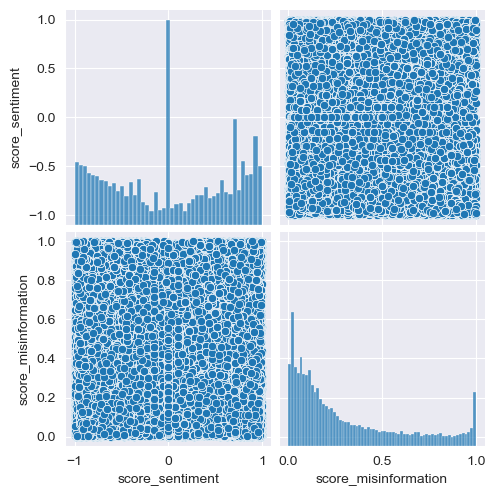

In [31]:
sns.pairplot(numeric_attributes.dropna())

#### Como nenhum atributo possui distribuição normal e nenhum par de atributos aparentam ter uma correlação linear, utilizarei Spearman

#### 1. O Coeficiente de Correlação apropriado

<Axes: >

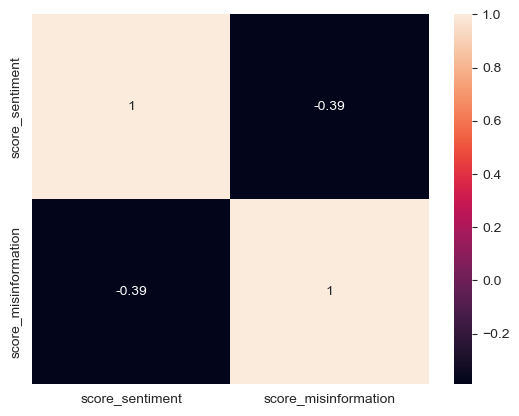

In [32]:
correlations = numeric_attributes.corr(method="spearman")
sns.heatmap(correlations, annot=True)

#### g) Para cada par de atributos categóricos apresente:


#### 1. O resultado do método V de Cramer

In [33]:
categorical_attributes = df.select_dtypes(include=[object, bool])

filtered_columns = [
    column for column in categorical_attributes.columns
    if 2 <= categorical_attributes[column].nunique() <= 200
]

filtered_columns

['id_group_anonymous',
 'media_type',
 'has_media',
 'has_media_url',
 'message_type']

In [34]:
def cramers_v(attr1, attr2):
    col1 = categorical_attributes[attr1].astype(str).fillna("None")
    col2 = categorical_attributes[attr2].astype(str).fillna("None")

    contingency = pd.crosstab(col1, col2)
    chi2, _, _, _ = scipy.stats.chi2_contingency(contingency)

    n = contingency.values.sum()
    k = min(contingency.shape) - 1

    return np.sqrt(chi2 / (n * k))

In [35]:
df_cramers_v = pd.DataFrame(index=filtered_columns, columns=filtered_columns)

for col1, col2 in product(filtered_columns, repeat=2):
    df_cramers_v.loc[col1, col2] = cramers_v(col1, col2)

df_cramers_v = df_cramers_v.astype(float)

df_cramers_v

,id_group_anonymous,media_type,has_media,has_media_url,message_type
id_group_anonymous,1.000000,0.147858,0.493266,0.444740,0.327767
media_type,0.147858,1.000000,1.000000,0.686874,0.931970
has_media,0.493266,1.000000,0.999994,0.496656,1.000000
has_media_url,0.444740,0.686874,0.496656,0.999992,0.686458
message_type,0.327767,0.931970,1.000000,0.686458,1.000000


<Axes: >

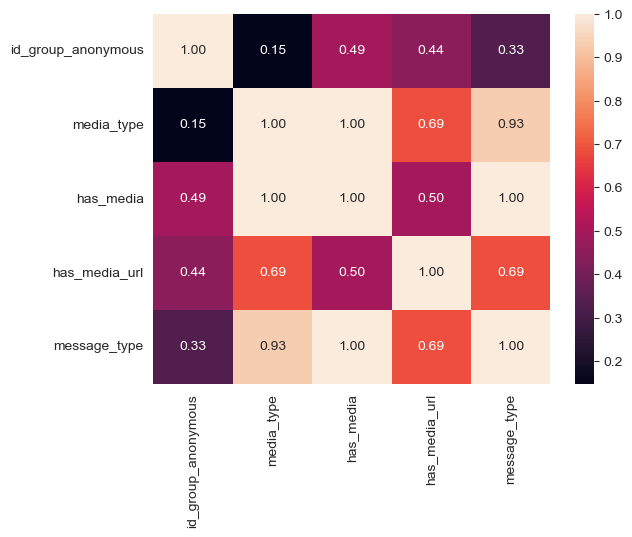

In [36]:
sns.heatmap(df_cramers_v, annot=True, fmt=".2f")

#### h) Crie uma visualização (gráfico) para apresentar:


#### 1. As quantidades de grupos, usuários e mensagens;

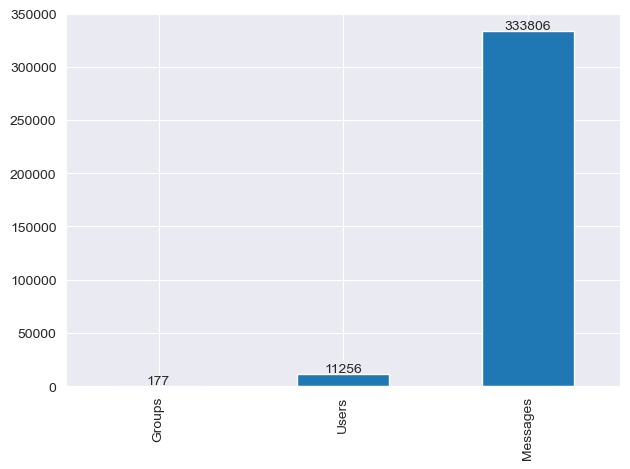

In [37]:
group_count = df["id_group_anonymous"].nunique()
user_count = df["id_member_anonymous"].nunique()
message_count = len(df)

summary_df = pd.DataFrame(
    [group_count, user_count, message_count],
    index=["Groups", "Users", "Messages"],
    columns=["Count"]
)

ax = summary_df.plot.bar(legend=False)

for i, value in enumerate(summary_df["Count"]):
    ax.text(i, value + 2000, str(value), ha="center")

plt.tight_layout()
plt.show()

#### 2. A quantidade de mensagens que possuem apenas texto X mídia;

has_media
False    0.636942
True     0.363058
Name: proportion, dtype: float64


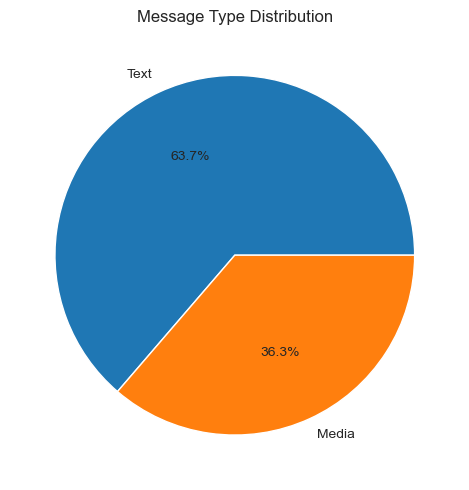

In [38]:
media_distribution = df["has_media"].value_counts(normalize=True)
print(media_distribution)

labels = ["Text", "Media"]
df["has_media"].value_counts().set_axis(labels).plot.pie(
    ylabel="",
    autopct="%1.1f%%",
    figsize=(5, 5)
)

plt.title("Message Type Distribution")
plt.tight_layout()
plt.show()

#### 3. Quantidade de mensagens por tipo de mídia (jpg, mp4 etc);


<Axes: ylabel='media_type'>

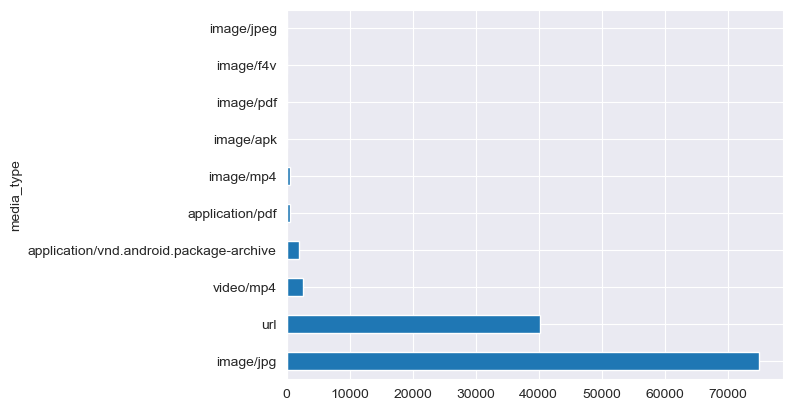

In [39]:
df["media_type"].value_counts()[lambda x: x > 20].plot.barh()

#### 4. A relação entre a quantidade de mensagens e a quantidade de palavras presente nas mensagens;

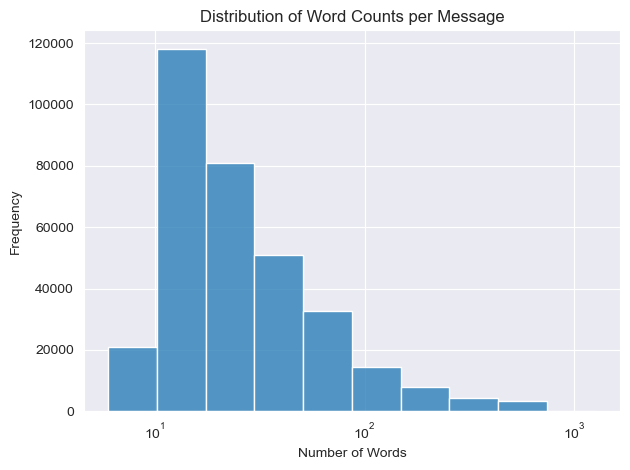

In [40]:
word_counts = df["text_content_anonymous"].apply(lambda text: len(str(text).split()))
word_counts.name = "word_count"

word_count_distribution = (
    word_counts.value_counts()
    .reset_index()
    .rename(columns={"index": "word_count", "word_count": "count"})
)

sns.histplot(data=word_counts, bins=10, log_scale=True)
plt.title("Distribution of Word Counts per Message")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#### 5. Quantidade de mensagens por estado;

#### 6. Quantidade de usuários por estado;


#### 7. Relação quantidade de usuários por quantidade de mensagens por estado;

#### 8. Quantidade de mensagens por país;

#### 9. Quantidade de mensagens Brasil X Países Estrangeiros;

#### 10. As 30 URLs que mais se repetem (mais compartilhadas);

<Axes: ylabel='media_url'>

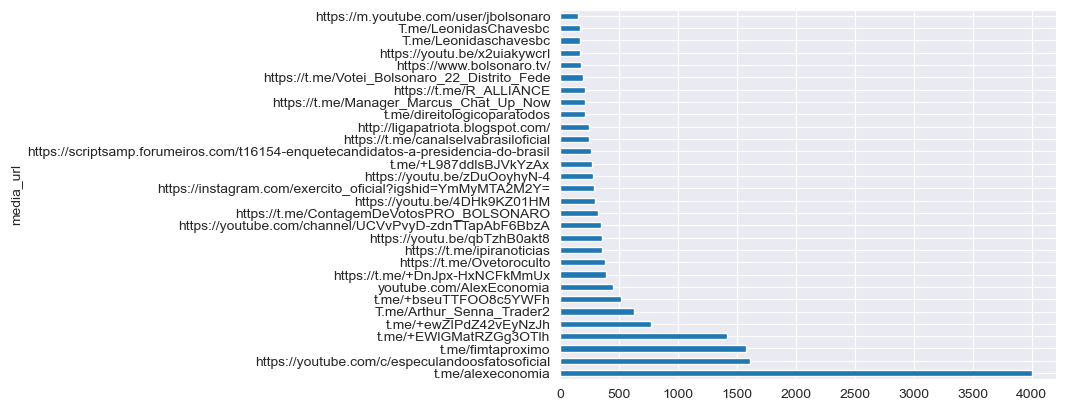

In [41]:
df["media_url"].value_counts().head(30).plot.barh()

#### Os 30 domínios que mais se repetem (mais compartilhados);

<Axes: ylabel='0'>

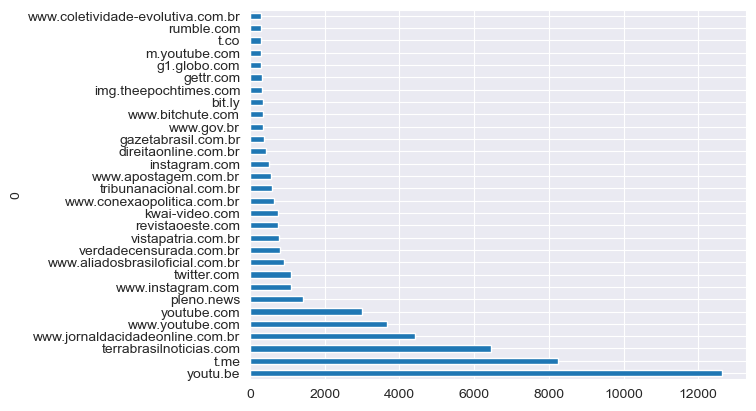

In [42]:
df["media_url"].str.extract(r"https?://([^/]+)")[0].value_counts().head(30).plot.barh()

#### 12. Os 30 usuários mais ativos;

In [43]:
df["id_member_anonymous"].value_counts().iloc[:30]

id_member_anonymous
abe534d581ec6d552243d6955d3c3cd8    12289
1665e22b0f564cd46d343f7677014821     5452
1ac091b8ed5c4e42383f1b4ff4cc9b2d     3196
c743967449a387ad2c1c7e03b2c45b36     3017
d49f81df0c75d1d72bee6c5b2d707da0     1571
f233cf8b1d4ede06f32199a7e0081bf5     1084
e8fd8fee8c39342d37993775da7756d5     1009
e7998863ac2a40086657fab4a6b463c9      914
c052c859b42c5a1923c22f5a201de746      807
fa582c9e95da255e44f4c198d0daf3df      790
773b9bd5b02a2e96f9d732c29bfcb663      640
7696d5103cdb8ac352d748a1db1126b0      621
56b8359fd127312651b80b8ed8030085      618
a378e9743fa3ca297df321cfa0e7cf6a      611
fbbbfb737acb18812f7de2400841abc3      583
e5e3e38d433016adf62ea34432853a3c      569
53e74af95497f943c524abaaa9482e33      525
9b34f45b5f8af4c37ba9ec1ebe2e3606      524
a398999c55f8d6f0c65760522ae12e45      520
f4561a21fb26cfbebf48dcd5c557f82f      510
26b496125c8b6773bce453e14f172430      505
beb77036ff26e78865da19310ac95169      495
7d41f1a2df245b0cc870f546c2aead0b      483
b4ce87d44421ef

#### 13. Relação entre quantidade de mensagens contendo somente texto e mensagens com tendo mídia dos usuários mais ativos:

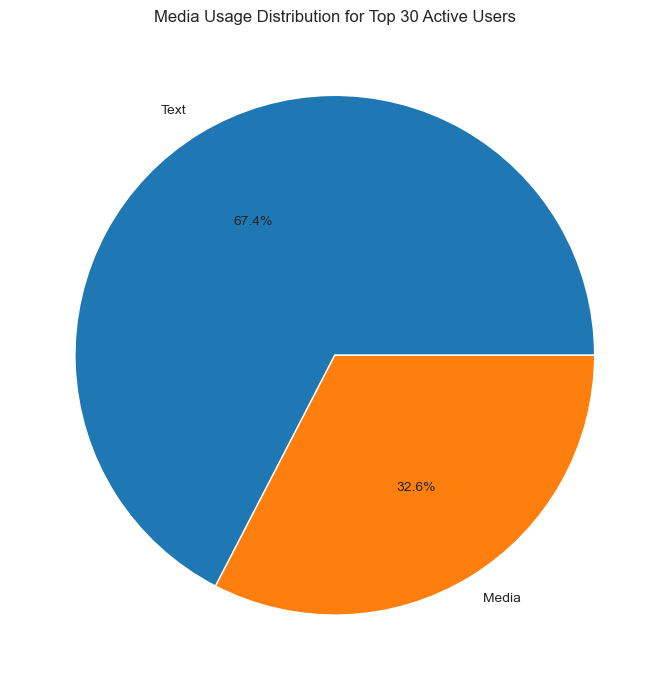

In [44]:
most_active_users = df["id_member_anonymous"].value_counts().iloc[:30].index

active_users_media_count = df[df["id_member_anonymous"].isin(most_active_users)]["has_media"].value_counts()

active_users_media_count.index = ["Text", "Media"]

active_users_media_count.plot.pie(ylabel="", autopct='%1.1f%%', figsize=(7, 7))
plt.title("Media Usage Distribution for Top 30 Active Users")
plt.tight_layout()
plt.show()

#### 14. Os 30 usuários que mais compartilharam texto;

In [45]:
df[df["has_media"] == False]["id_member_anonymous"].value_counts().iloc[:30]

id_member_anonymous
abe534d581ec6d552243d6955d3c3cd8    12289
c743967449a387ad2c1c7e03b2c45b36     2865
1665e22b0f564cd46d343f7677014821     2480
d49f81df0c75d1d72bee6c5b2d707da0     1571
f233cf8b1d4ede06f32199a7e0081bf5     1018
e8fd8fee8c39342d37993775da7756d5      698
a378e9743fa3ca297df321cfa0e7cf6a      596
7696d5103cdb8ac352d748a1db1126b0      560
26b496125c8b6773bce453e14f172430      502
7d41f1a2df245b0cc870f546c2aead0b      483
b4ce87d44421ef3d2c4710051df5fe40      478
e7998863ac2a40086657fab4a6b463c9      427
1ac091b8ed5c4e42383f1b4ff4cc9b2d      417
22722eeb9ae4be8f45581e69eb707be4      406
a398999c55f8d6f0c65760522ae12e45      402
39ee10516124280a22f1798f2a41f9a7      368
065039508ed6e276e5f092dd22eaef94      360
e5e3e38d433016adf62ea34432853a3c      349
8e72a8fbc76263914ed485ab068396fd      333
8294d1400a9c3b268b23bb3047185101      331
27f5833380581fab3453c1acd26427d5      328
3bc8b1ec90f8f23e38a6d953e8faab61      326
f4561a21fb26cfbebf48dcd5c557f82f      301
566ba5c5eeeac2

#### 15. Os 30 usuários que mais compartilharam mídias;


In [46]:
df[df["has_media"] == True]["id_member_anonymous"].value_counts().iloc[:30]

id_member_anonymous
1665e22b0f564cd46d343f7677014821    2972
1ac091b8ed5c4e42383f1b4ff4cc9b2d    2779
c052c859b42c5a1923c22f5a201de746     712
fa582c9e95da255e44f4c198d0daf3df     674
56b8359fd127312651b80b8ed8030085     492
e7998863ac2a40086657fab4a6b463c9     487
53e74af95497f943c524abaaa9482e33     460
9794a13f91433216821ad18624372498     458
5d321b03e74b751ac577ef022350306d     449
3f64a652deccf6273d7d769252bdfb46     433
3e49fd40fd973ee1b8f1a6d58feb4a54     412
beb77036ff26e78865da19310ac95169     402
773b9bd5b02a2e96f9d732c29bfcb663     400
eaef2dbdc2914b034116569bc8919403     374
96c8dffb29c65cd1905239dc64196f03     345
fbbbfb737acb18812f7de2400841abc3     341
6134f475127170f39fe48d53f874080e     331
92a98298316caf5bdbd65acfc20908a7     326
79fa510c3ab44548d903284ab9162c9d     312
e8fd8fee8c39342d37993775da7756d5     311
40743c2ea5139af088057763ab069b1a     308
c6f406117d909c73ea9c11de8560f5c3     290
4d1389bd32de5dfc0a3fab14573131ac     278
9b34f45b5f8af4c37ba9ec1ebe2e3606     

#### 16. As 30 mensagens mais compartilhadas;

In [47]:
df["text_content_anonymous"].value_counts().head(30)

text_content_anonymous
This community was blocked in Brazil following a decision of the Superior Electoral Court (TSE).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

#### 17. As 30 mensagens mais compartilhadas em grupos diferentes;

In [48]:
top_shared_messages = (
    df.groupby("text_content_anonymous")["id_group_anonymous"]
    .nunique()
    .sort_values(ascending=False)
    .head(30)
)

top_shared_messages

text_content_anonymous
This community was blocked in Brazil following a decision of the Superior Electoral Court (TSE).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

#### 18. Mensagens idênticas compartilhadas pelo mesmo usuário (e suas quantidades);


In [49]:
identical_messages = (
    df.groupby(["id_member_anonymous", "text_content_anonymous"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

identical_messages = identical_messages[identical_messages["count"] > 1]

identical_messages

,id_member_anonymous,text_content_anonymous,count
104601,f233cf8b1d4ede06f32199a7e0081bf5,This community was blocked in Brazil following...,838
86833,c743967449a387ad2c1c7e03b2c45b36,This community was blocked in Brazil following...,532
44952,7696d5103cdb8ac352d748a1db1126b0,This community was blocked in Brazil following...,530
7192,1665e22b0f564cd46d343f7677014821,Bem vindo(a) ao grupo Ipirá Notícias. \n\nComp...,357
60745,a398999c55f8d6f0c65760522ae12e45,This community was blocked in Brazil following...,308
...,...,...,...
109924,ffc9a05bc908b802ad4051cdaa7d4a8b,"Assista a ""ETERNO HERÓI ALANA PASSOS, SARGENTO...",2
109925,ffc9a05bc908b802ad4051cdaa7d4a8b,"Assista a ""Fazer o ""L"" é sinal de LADRÃO - Pag...",2
51451,891fb3d60150c739346ca09f1237643b,"Compartilho como recebi:\n\n""Negócio é o segui...",2
109927,ffc9a05bc908b802ad4051cdaa7d4a8b,"Assista a ""Presidente Jair Bolsonaro no BSM - ...",2


#### 19. Mensagens idênticas compartilhadas pelo mesmo usuário em grupos distintos (e suas quantidades);


In [50]:
identical_messages_groups = (
    df.groupby(["id_member_anonymous", "text_content_anonymous", "id_group_anonymous"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

identical_messages_groups = identical_messages_groups[identical_messages_groups["count"] > 1]

identical_messages_groups

,id_member_anonymous,text_content_anonymous,id_group_anonymous,count
114526,f233cf8b1d4ede06f32199a7e0081bf5,This community was blocked in Brazil following...,857cd5311da1bdc15eb9e6918a47c6c6,821
95719,c743967449a387ad2c1c7e03b2c45b36,This community was blocked in Brazil following...,f0944ed1832d8c1f1213d6123746f111,532
50957,7696d5103cdb8ac352d748a1db1126b0,This community was blocked in Brazil following...,9f2d7394334eb224c061c9740b5748fc,530
7931,1665e22b0f564cd46d343f7677014821,Bem vindo(a) ao grupo Ipirá Notícias. \n\nComp...,7b881a0281c00185ff095012fbeb8001,357
68157,a398999c55f8d6f0c65760522ae12e45,This community was blocked in Brazil following...,857cd5311da1bdc15eb9e6918a47c6c6,308
...,...,...,...,...
120661,ff82291d0e1c46a31207ab5d6134f79b,ⓘ 𝘾𝙤𝙢𝙚𝙣𝙩𝙖́𝙧𝙞𝙤 𝙍𝙚𝙢𝙤𝙫𝙞𝙙𝙤 𝙋𝙚𝙡𝙤 𝙏𝙧𝙞𝙗𝙪𝙣𝙖𝙡 𝙎𝙪𝙥𝙚𝙧𝙞𝙤𝙧 ...,5b10d7739171149be6d9961e3350c071,2
120662,ff82291d0e1c46a31207ab5d6134f79b,ⓘ 𝘾𝙤𝙢𝙚𝙣𝙩𝙖́𝙧𝙞𝙤 𝙍𝙚𝙢𝙤𝙫𝙞𝙙𝙤 𝙋𝙚𝙡𝙤 𝙏𝙧𝙞𝙗𝙪𝙣𝙖𝙡 𝙎𝙪𝙥𝙚𝙧𝙞𝙤𝙧 ...,857cd5311da1bdc15eb9e6918a47c6c6,2
120663,ff82291d0e1c46a31207ab5d6134f79b,ⓘ 𝘾𝙤𝙢𝙚𝙣𝙩𝙖́𝙧𝙞𝙤 𝙍𝙚𝙢𝙤𝙫𝙞𝙙𝙤 𝙋𝙚𝙡𝙤 𝙏𝙧𝙞𝙗𝙪𝙣𝙖𝙡 𝙎𝙪𝙥𝙚𝙧𝙞𝙤𝙧 ...,d9c080b9db8cd9d0e88e870ce782c01a,2
120664,ff82291d0e1c46a31207ab5d6134f79b,ⓘ 𝘾𝙤𝙢𝙚𝙣𝙩𝙖́𝙧𝙞𝙤 𝙍𝙚𝙢𝙤𝙫𝙞𝙙𝙤 𝙋𝙚𝙡𝙤 𝙏𝙧𝙞𝙗𝙪𝙣𝙖𝙡 𝙎𝙪𝙥𝙚𝙧𝙞𝙤𝙧 ...,e56ec342fc599ebb4ed89655eb6f03aa,2


#### 20. Os 30 unigramas, bigramas e trigramas mais compartilhados (após a remoção de stop words);

In [51]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alvar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\alvar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alvar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
stop_words = set(stopwords.words("portuguese"))


def get_ngrams(text, n):
    text = str(text).lower()
    tokens = [word for word in text.split() if word not in stop_words]

    return ngrams(tokens, n)


def get_top_ngrams(df, n, top_k=30):
    ngrams_list = df["text_content_anonymous"].apply(lambda x: get_ngrams(x, n))
    ngrams_flat = [ngram for sublist in ngrams_list for ngram in sublist]
    ngram_counts = pd.Series(ngrams_flat).value_counts().head(top_k)

    return ngram_counts

In [53]:
unigrams = get_top_ngrams(df, 1)
bigrams = get_top_ngrams(df, 2)
trigrams = get_top_ngrams(df, 3)

<Axes: title={'center': 'Top 30 Unigrams'}>

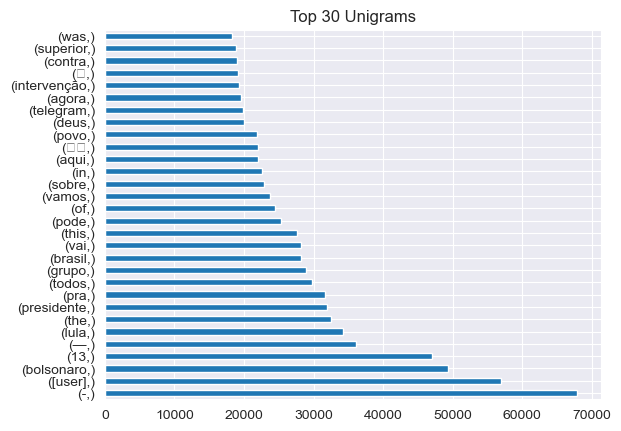

In [54]:
unigrams.plot.barh(title="Top 30 Unigrams")

<Axes: title={'center': 'Top 30 Bigrams'}>

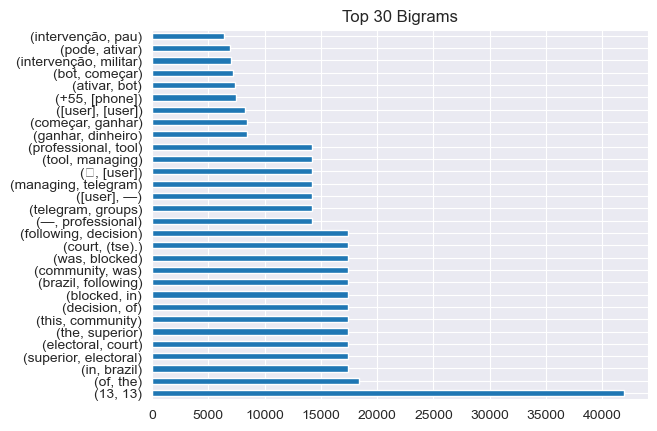

In [55]:
bigrams.plot.barh(title="Top 30 Bigrams")

<Axes: title={'center': 'Top 30 Trigrams'}>

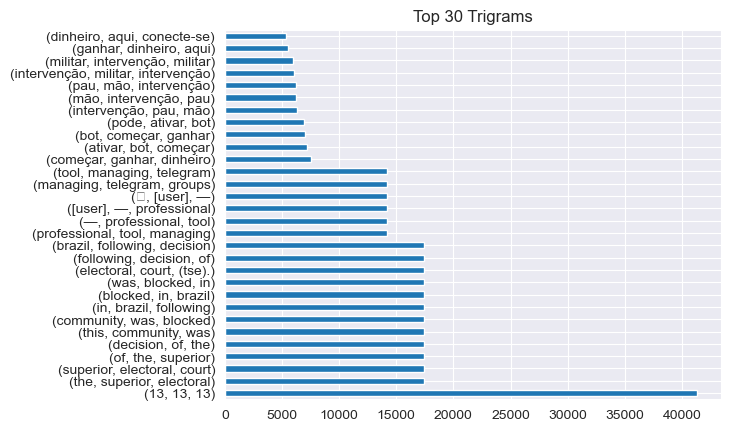

In [56]:
trigrams.plot.barh(title="Top 30 Trigrams")

#### 21. As 30 mensagens mais positivas (distintas);

In [57]:
df.groupby("text_content_anonymous")["score_sentiment"].mean().sort_values(ascending=False).iloc[:30]

text_content_anonymous
Shemoneh Esreh – Amidá – A Grande Oração\n\n ,Avot - Benção dos Patriarcas\n\nÓ Senhor, abre os meus lábios e minha boca proclamará o Louvor a Ti! \nBendito sejas Tu, Eterno, nosso D-us e D-us de nossos pais; D-us de Abraão, D-us de Isaac e\nD-us de Jacob, o Grande, o Poderoso e Temível D-us; Altíssimo D-us que outorga bondades, que \ntudo cria e que recorda os atos de bondade dos Patriarcas e que com grande amor fará vir um \nRedentor aos filhos de seus filhos, por amor do Seus nome. Ó Rei, Auxiliador, Salvador e \nEscudo! Bendito sejas Tu, Eterno, Escudo de Abraão\n\nגבורות ,Gevurot - Benção do \nTodo-Poderoso\n\nTu, Eterno, és Poderoso para sempre; Tu ressuscitas os mortos; Tu és Poderoso para salvar. \n(Tu fazes soprar o vento e cair a chuva). Tu sustentas os vivos com amorosa bondade, Tu \nressuscitas os mortos com imensa misericórdia, amparas os que estão caindo, cura os doentes, libertas os cativos e cumpres a Tua promessa aos que dormem no pó. Quem é \nco

#### 22. As 30 mensagens mais negativas (distintas);

In [58]:
df.groupby("text_content_anonymous")["score_sentiment"].mean().sort_values(ascending=True).iloc[:30]

text_content_anonymous
CAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA 💩\nCA

#### 23. O usuário mais otimista;

In [59]:
df.groupby("id_member_anonymous")["score_sentiment"].mean().sort_values(ascending=False).reset_index().iloc[0]

id_member_anonymous    5d0e50d6d2183bf16ec637ed24131870
score_sentiment                                  0.9967
Name: 0, dtype: object

#### 24. O usuário mais pessimista;

In [60]:
df.groupby("id_member_anonymous")["score_sentiment"].mean().sort_values(ascending=True).reset_index().iloc[0]

id_member_anonymous    243a43d802953032e1ea9a363546c3b8
score_sentiment                                 -0.9992
Name: 0, dtype: object

#### 25. As 30 maiores mensagens;


In [61]:
df["text_content_anonymous"].str.len().sort_values(ascending=False).head(30)

458051    4096
125419    4096
425945    4096
125383    4096
13019     4096
425950    4096
1532      4096
31139     4096
425946    4096
360198    4096
425949    4096
4927      4096
117       4096
22613     4096
106086    4096
3589      4096
407546    4096
425947    4096
411626    4095
418736    4095
322483    4095
229743    4095
432006    4095
482213    4095
478803    4095
170026    4094
426144    4094
159566    4094
170025    4094
434347    4093
Name: text_content_anonymous, dtype: int64

#### 26. As 30 menores mensagens;


In [62]:
df["text_content_anonymous"].str.len().sort_values(ascending=True).head(30)

109335    15
313542    15
316304    15
316249    15
213654    15
121420    15
110250    15
121684    15
83306     15
501216    15
121685    15
110674    15
329930    15
313549    15
213303    15
87034     16
105731    16
352750    16
225854    16
509723    16
94454     16
110054    16
330356    16
509916    16
383095    16
112182    16
504337    16
114300    16
521588    16
225189    16
Name: text_content_anonymous, dtype: int64

#### 27. O dia em que foi publicado a maior quantidade de mensagens;

In [63]:
df["date_message"] = pd.to_datetime(df["date_message"])

df["date_only"] = df["date_message"].dt.date

most_active_day = df["date_only"].value_counts().idxmax()

most_active_day.strftime("%d/%m/%Y")

'01/11/2022'

#### 28. As mensagens que possuem as palavras “FACÇÃO” e “CRIMINOSA”;

In [64]:
other_df = pd.read_csv("../data/fakeTelegram.BR_2022.csv", quoting=csv.QUOTE_NONE, on_bad_lines="skip", engine="python")

other_df[(other_df["text_content_anonymous"].str.contains("INTERVENÇÃO")) &
         (other_df["text_content_anonymous"].str.contains("MILITAR"))]["text_content_anonymous"]

47566      Meu Querido acorda VOCÊ quer vencer o inimigo ...
56598      O mesmo BLA BLA BLA DE SEMPRE......vai pra MER...
235174     "O DILEMA IMPOSTO E A INTERVENÇÃO MILITAR ELEI...
245242     "SUGERI IRMOS PARA RUAS COM SEGUINTE  DIZERES;...
246971     É MELHOR SER PRESO PELO CABEÇA DE PEROCA DO QU...
                                 ...                        
1311778    "PARALIZAÇÃO DOS CAMINHONEIROS PELA INTERVENÇÃ...
1311781    "PARALIZAÇÃO DOS CAMINHONEIROS PELA INTERVENÇÃ...
1314088    "ACORDA BRASIL NÃO HAVERÁ FAXINA GERAL SEM A I...
1314232    "ACORDA BRASIL NÃO HAVERÁ FAXINA GERAL SEM A I...
1317494          "INTERVENÇÃO MILITAR VS INTERVENÇÃO FEDERAL
Name: text_content_anonymous, Length: 95, dtype: object

In [65]:
del other_df

#### 29. Quantidade de mensagens por dia e hora;

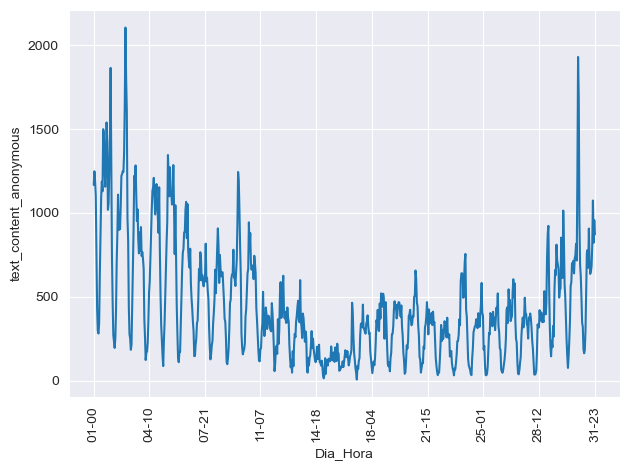

In [68]:
df_29 = (
    df.copy()
    .assign(Dia_Hora=df["date_message"].dt.strftime("%d-%H"))
    .groupby("Dia_Hora", as_index=False)["text_content_anonymous"]
    .count()
)

sns.lineplot(data=df_29, x="Dia_Hora", y="text_content_anonymous")

num_labels = 10
ticks = np.linspace(0, len(df_29) - 1, num_labels, dtype=int)
plt.xticks(ticks, df_29['Dia_Hora'].iloc[ticks], rotation=90)

plt.tight_layout()
plt.show()

In [69]:
del df_29

#### 30. Quantidade de mensagens por hora;


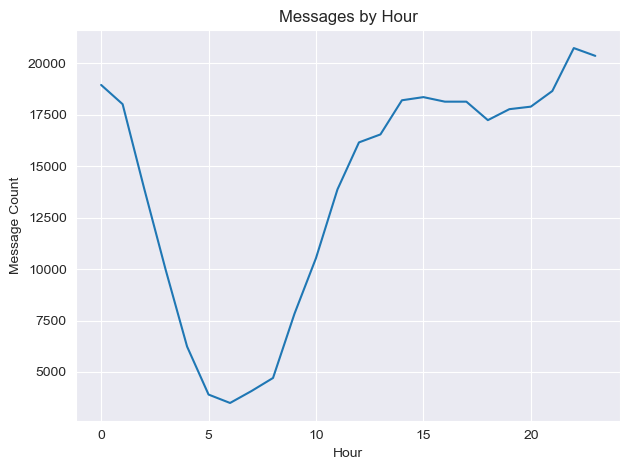

In [70]:
df_30 = (
    df.copy()
    .assign(Hora=df['date_message'].dt.hour)
    .groupby("Hora", as_index=False)["text_content_anonymous"]
    .count()
)

sns.lineplot(data=df_30, x="Hora", y="text_content_anonymous")

plt.title("Messages by Hour")
plt.xlabel("Hour")
plt.ylabel("Message Count")
plt.tight_layout()
plt.show()

In [71]:
del df_30

#### 31. A nuvem de palavras referente às mensagens de texto (após a remoção de stop words);

In [142]:
def cleanse_string(x):
    words = word_tokenize(x)

    cleansed_words = [
        re.sub(r'[^a-zA-Z\s]', '', word)
        for word in words
        if word.lower() not in stop_words
    ]

    return " ".join(cleansed_words).strip()

DataFrame shape: (333806, 20)


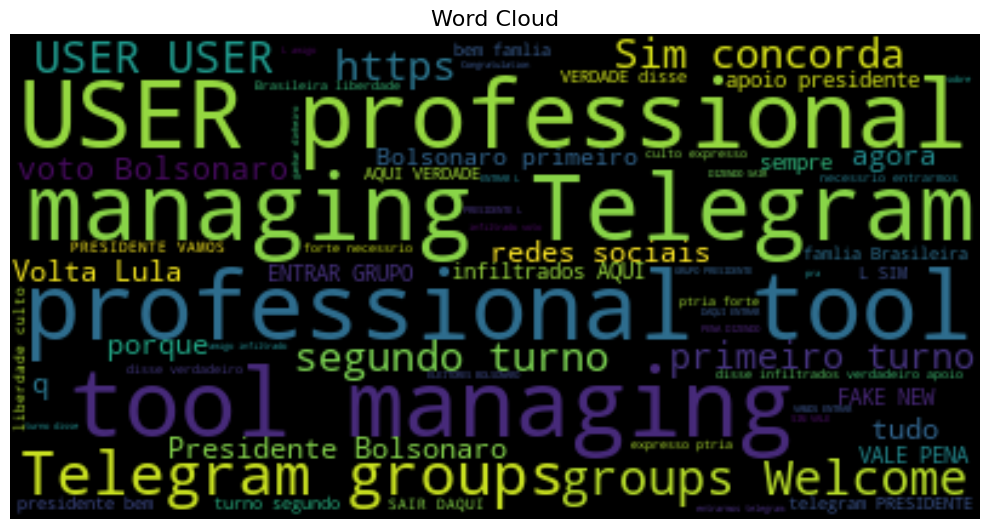

In [152]:
print(f"DataFrame shape: {df.shape}")

wordcloud = WordCloud().generate(cleanse_string(" ".join(df["text_content_anonymous"].iloc[:50000])))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud", fontsize=16)
plt.tight_layout()
plt.show()

#### 32. A rede interativa das palavras referente às mensagens de texto (após a remoção de stop words);

#### 33. Proporção de mensagens com e sem URL;

<Axes: >

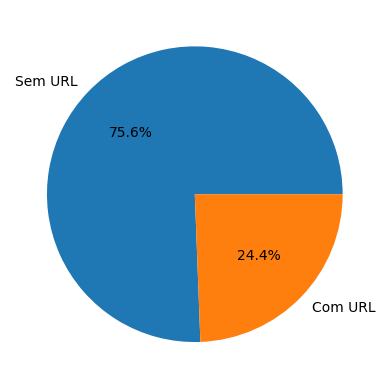

In [155]:
df["has_media_url"].value_counts().set_axis(["Sem URL", "Com URL"]).plot.pie(ylabel = "", autopct='%1.1f%%')

#### 34. Proporção de desinformação;

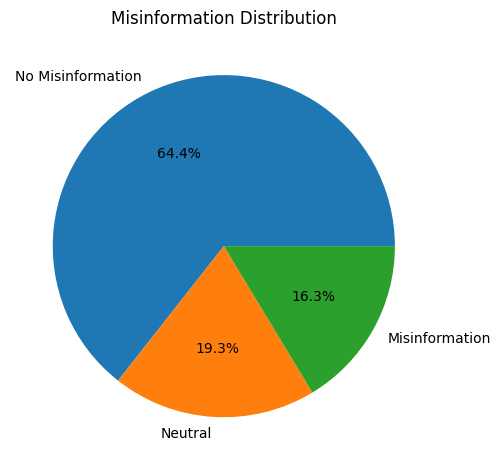

In [162]:
bins = [float('-inf'), 0.33, 0.67, float('inf')]
labels = ["No Misinformation", "Neutral", "Misinformation"]

df["misinformation_label"] = pd.cut(df["score_misinformation"], bins=bins, labels=labels)

df["misinformation_label"].value_counts().plot.pie(
    ylabel="",
    autopct='%1.1f%%',
    title="Misinformation Distribution"
)

plt.tight_layout()
plt.show()

#### 35. Proporção de mensagens contendo mídia e desinformação;

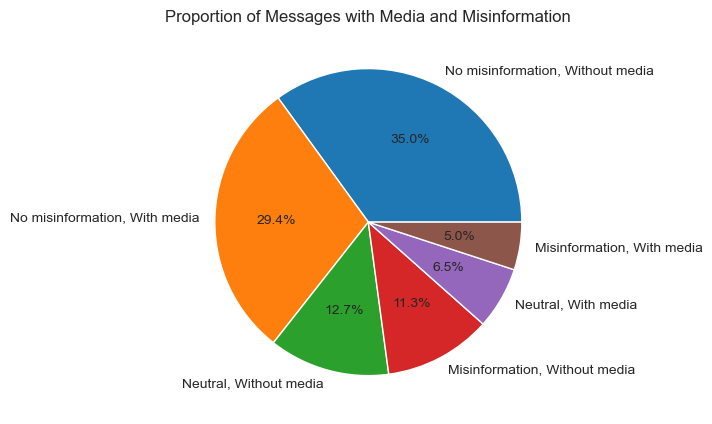

In [8]:
def classify_misinformation(score):
    if pd.isna(score):
        return np.nan
    if score < 0.33:
        return "No misinformation"
    elif score < 0.67:
        return "Neutral"
    return "Misinformation"

def combined_labels(df):
    misinfo_labels = df["score_misinformation"].apply(classify_misinformation)
    media_labels = df["has_media"].map({True: "With media", False: "Without media"})

    valid = ~(misinfo_labels.isna() | media_labels.isna())
    combined = misinfo_labels[valid] + ", " + media_labels[valid]

    return combined

combined_labels(df).value_counts().plot.pie(
    ylabel="", autopct="%1.1f%%", figsize=(7, 7)
)
plt.title("Proportion of Messages with Media and Misinformation")
plt.tight_layout()
plt.show()

#### 36. Distribuição de mensagens por score de desinformação;

<Axes: >

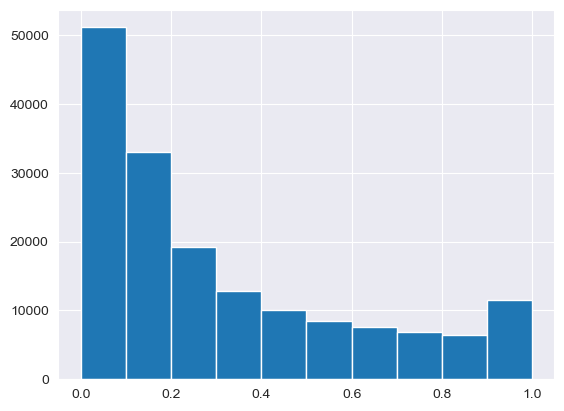

In [72]:
df["score_misinformation"].hist()

#### 37. Proporção de sentimentos;


<Axes: >

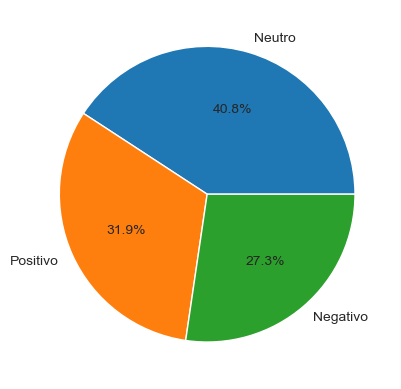

In [73]:
def label_sentiment(x):
    if np.isnan(x):
        return np.nan
    elif x < -0.33:
        return "Negativo"
    elif x < 0.34:
        return "Neutro"

    return "Positivo"

df["score_sentiment"].apply(label_sentiment).value_counts().plot.pie(ylabel ="", autopct='%1.1f%%')

#### 38. Distribuição de mensagens por score de sentimentos;

<Axes: >

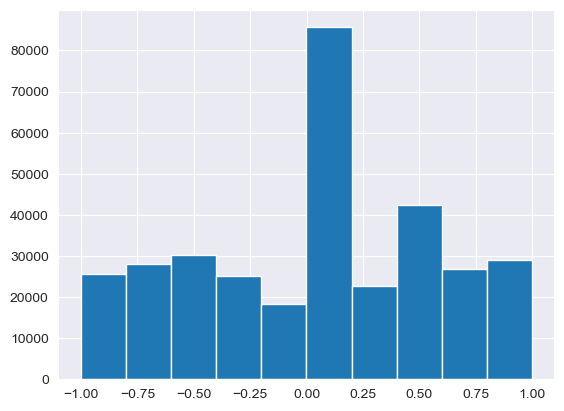

In [74]:
df["score_sentiment"].hist()

#### 39. Proporção entre mensagens virais e não virais;

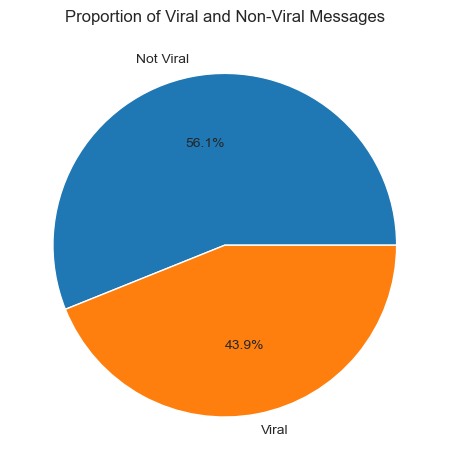

In [75]:
text_frequency = df["text_content_anonymous"].value_counts()

viral_texts = text_frequency[text_frequency > 1].index

df["viral"] = df["text_content_anonymous"].isin(viral_texts).astype(int)

proportions = df["viral"].value_counts().set_axis(["Not Viral", "Viral"])

proportions.plot.pie(
    ylabel="",
    autopct='%1.1f%%',
    title="Proportion of Viral and Non-Viral Messages"
)

plt.tight_layout()
plt.show()

#### 40. Algo que você julga importante e que ainda não foi solicitado;
